<a href="https://colab.research.google.com/github/Bilal-XQ/Bilal-XQ/blob/main/TP_Arbres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EST Safi  
Année2025/2026  

TP4 : Arbres de Décision – Prédiction de la Réussite Scolaire  

IA & SSR

### Objectif

Prédire si un étudiant va **réussir** ou **échouer** à un examen final en fonction de ses caractéristiques académiques et comportementales.


## Partie 1 : Génération du Dataset Synthétique

### 1.1 Création du fichier CSV avec 100 étudiants

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
n_students = 100

data = {
    'Heures_etude': np.random.randint(1, 30, n_students),
    'Participation': np.random.randint(0, 100, n_students),
    'Moyenne_semestre': np.round(np.random.uniform(8, 20, n_students), 1),
    'Absences': np.random.randint(0, 20, n_students),
    'Support_parental': np.random.choice(['Faible', 'Moyen', 'Fort'], n_students),
    'Acces_ressources': np.random.choice(['Non', 'Oui'], n_students),
    'Reussite': None  # À déterminer
}

df = pd.DataFrame(data)

# Définition de la variable cible basée sur des règles
for i in range(n_students):
    score = (
        df.loc[i, 'Heures_etude'] * 0.3 +
        df.loc[i, 'Participation'] * 0.002 +
        df.loc[i, 'Moyenne_semestre'] * 0.4 -
        df.loc[i, 'Absences'] * 0.5
    )
    if df.loc[i, 'Support_parental'] == 'Fort':
        score += 2
    if df.loc[i, 'Acces_ressources'] == 'Oui':
        score += 1

    df.loc[i, 'Reussite'] = 1 if score > 15 else 0

# Convert to integer
df['Reussite'] = df['Reussite'].astype(int)

# Sauvegarde du fichier
df.to_csv('etudiants_reussite.csv', index=False, encoding='utf-8')


### Colonnes du dataset :

- **Heures_etude** : Nombre d’heures d’étude par semaine  
- **Participation** : Pourcentage de participation en classe  
- **Moyenne_semestre** : Moyenne générale du semestre (/20)  
- **Absences** : Nombre d’absences  
- **Support_parental** : Niveau de soutien parental (Faible/Moyen/Fort)  
- **Acces_ressources** : Accès à des ressources supplémentaires (Oui/Non)  
- **Reussite** : Variable cible (1 = Réussite, 0 = Échec)


## Partie 2 : Exploration et Préparation des Données

### 2.1 Exploration

In [ ]:
print("=== Exploration du Dataset ===")
print(df.head())

print("\nInformations générales :")
print(df.info())

print("\nStatistiques descriptives :")
print(df.describe())

print("\nDistribution de la variable cible :")
print(df['Reussite'].value_counts())


=== Exploration du Dataset ===
   Heures_etude  Participation  Moyenne_semestre  Absences Support_parental  \
0             7             71              11.8        11            Moyen   
1            20             77               9.3        18            Moyen   
2            29             86              10.7        13           Faible   
3            15             61              13.1         5             Fort   
4            11             39              17.8         5            Moyen   

  Acces_ressources  Reussite  
0              Non         0  
1              Non         0  
2              Non         0  
3              Oui         0  
4              Oui         0  

Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Heures_etude      100 non-null    int64  
 1   Participation     100 non-null   

### 2.2 Encodage des variables catégorielles

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encodage de Support_parental
le_parental = LabelEncoder()
df['Support_parental_encoded'] = le_parental.fit_transform(df['Support_parental'])

# Encodage de Acces_ressources
df['Acces_ressources_encoded'] = df['Acces_ressources'].map({'Non': 0, 'Oui': 1})


### 2.3 Sélection des features

In [ ]:
features = ['Heures_etude', 'Participation', 'Moyenne_semestre',
            'Absences', 'Support_parental_encoded', 'Acces_ressources_encoded']

X = df[features]
y = df['Reussite']


### 2.4 Split train/test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("\nTaille des ensembles :")
print(f"Train : {X_train.shape[0]} étudiants")
print(f"Test : {X_test.shape[0]} étudiants")



Taille des ensembles :
Train : 70 étudiants
Test : 30 étudiants


## Partie 3 : Construction de l'Arbre de Décision

### 3.1 Modèle par défaut

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Modèle 1 : avec critère Gini (par défaut)
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)

print("=== Modèle 1 (Gini) ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred1):.3f}")
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred1))

print("\nRapport de classification :")
print(classification_report(y_test, y_pred1))


=== Modèle 1 (Gini) ===
Accuracy : 0.967
Matrice de confusion :
[[29  1]
 [ 0  0]]

Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.00      0.00      0.00         0

    accuracy                           0.97        30
   macro avg       0.50      0.48      0.49        30
weighted avg       1.00      0.97      0.98        30



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 3.2 Modèle avec paramètres optimisés

In [ ]:
# Modèle 2 : avec critère Entropie et profondeur limitée
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

print("\n=== Modèle 2 (Entropie, max_depth=3) ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred2):.3f}")
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred2))



=== Modèle 2 (Entropie, max_depth=3) ===
Accuracy : 0.967
Matrice de confusion :
[[29  1]
 [ 0  0]]


EST Safi  
Année2025/2026  
TP Intelligence Artificielle  
Arbres de Décision  
IA & SSR

## Partie 4 : Visualisation de l'Arbre

### 4.1 Installation des dépendances

In [ ]:
# bash
!pip install graphviz



### 4.2 Code de visualisation

# Matplotlib Visualization

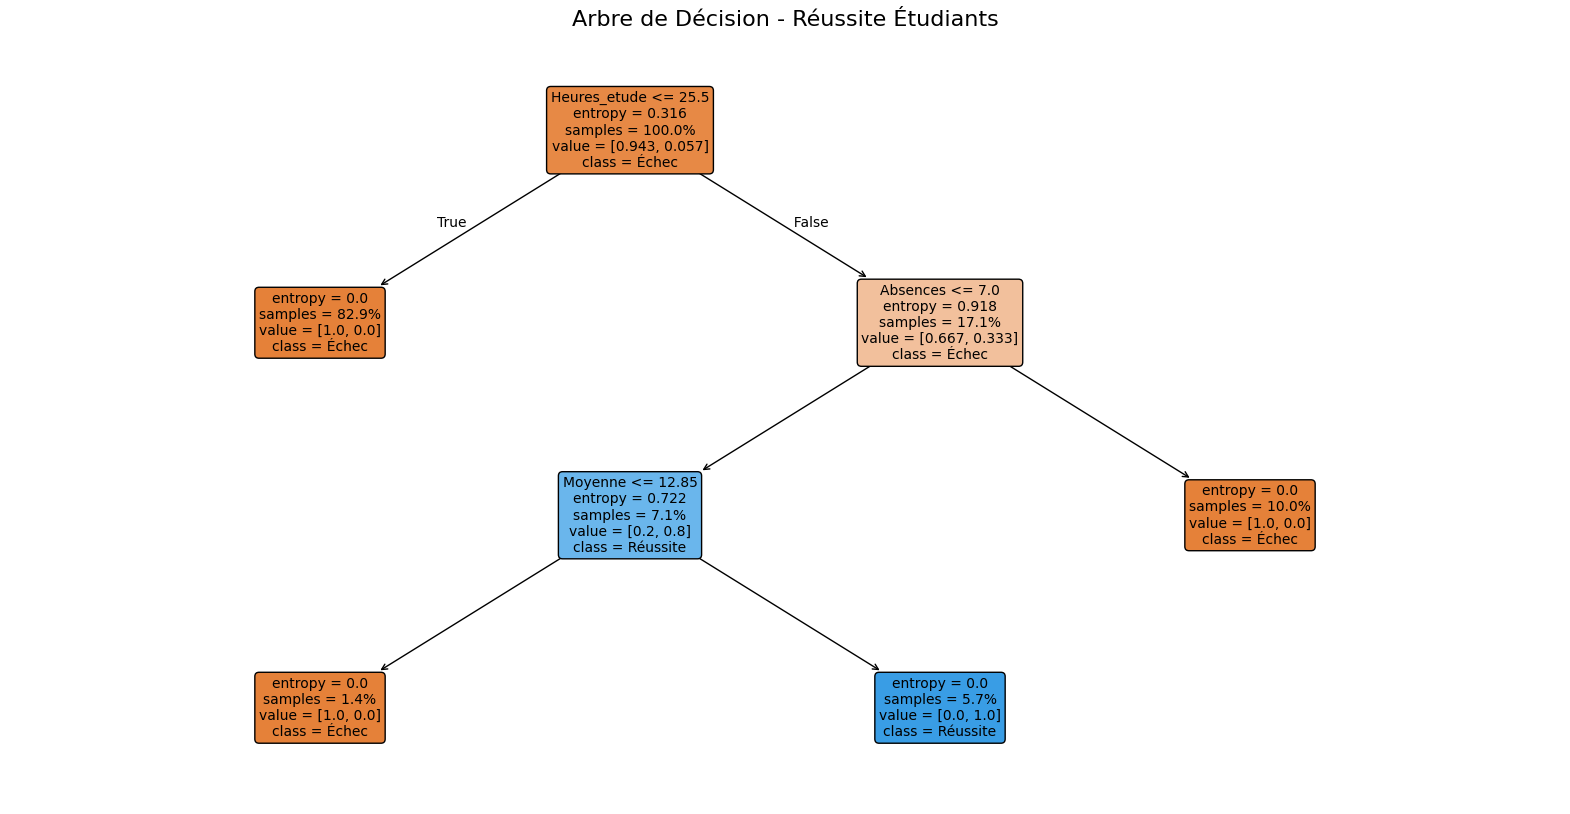

Arbre sauvegardé : arbre_reussite_etudiants_matplotlib.png


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Noms des features pour l'affichage
feature_names = ['Heures_etude', 'Participation', 'Moyenne',
                 'Absences', 'Support_parental', 'Acces_ressources']

# Visualisation du modèle 2 avec matplotlib
plt.figure(figsize=(20, 10))
plot_tree(
    model2,
    feature_names=feature_names,
    class_names=['Échec', 'Réussite'],
    filled=True,
    rounded=True,
    fontsize=10,
    proportion=True
)
plt.title("Arbre de Décision - Réussite Étudiants", fontsize=16)
plt.savefig("arbre_reussite_etudiants_matplotlib.png", dpi=300, bbox_inches='tight')
plt.show()
print("Arbre sauvegardé : arbre_reussite_etudiants_matplotlib.png")

# Graphviz Visualization

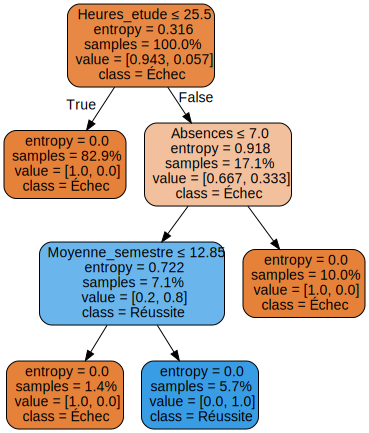

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
import shutil
from IPython.display import SVG, display

# Prefer DataFrame columns if available
try:
    feature_names = X_train.columns.tolist()
except Exception:
    feature_names = ['Heures_etude', 'Participation', 'Moyenne_semestre',
                     'Absences', 'Support_parental_encoded', 'Acces_ressources_encoded']

# Build DOT data
dot_data = export_graphviz(
    model2,
    out_file=None,
    feature_names=feature_names,
    class_names=['Échec', 'Réussite'],
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True
)

graph = graphviz.Source(dot_data)

# Try to render SVG inline (works in Colab/Jupyter if 'dot' is available)
try:
    svg_bytes = graph.pipe(format='svg')  # requires dot
    display(SVG(svg_bytes.decode('utf-8')))
except Exception as e:
    # Fallback: show the graph object (Jupyter may still render it) and print hint
    display(graph)
    if shutil.which("dot") is None:
        print("NOTE: 'dot' executable not found in PATH — inline rasterization may fail.")
        print("Install Graphviz (https://graphviz.org/download/) or add its bin folder to PATH, then restart the kernel.")